****Data Cleaning & Preprocessing****

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GlobalWeatherRepository.csv")

print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50085 entries, 0 to 50084
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       50085 non-null  object 
 1   location_name                 50085 non-null  object 
 2   latitude                      50085 non-null  float64
 3   longitude                     50085 non-null  float64
 4   timezone                      50085 non-null  object 
 5   last_updated_epoch            50085 non-null  int64  
 6   last_updated                  50085 non-null  object 
 7   temperature_celsius           50085 non-null  float64
 8   temperature_fahrenheit        50085 non-null  float64
 9   condition_text                50085 non-null  object 
 10  wind_mph                      50085 non-null  float64
 11  wind_kph                      50085 non-null  float64
 12  wind_degree                   50085 non-null  

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

df.fillna(df.mode().iloc[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

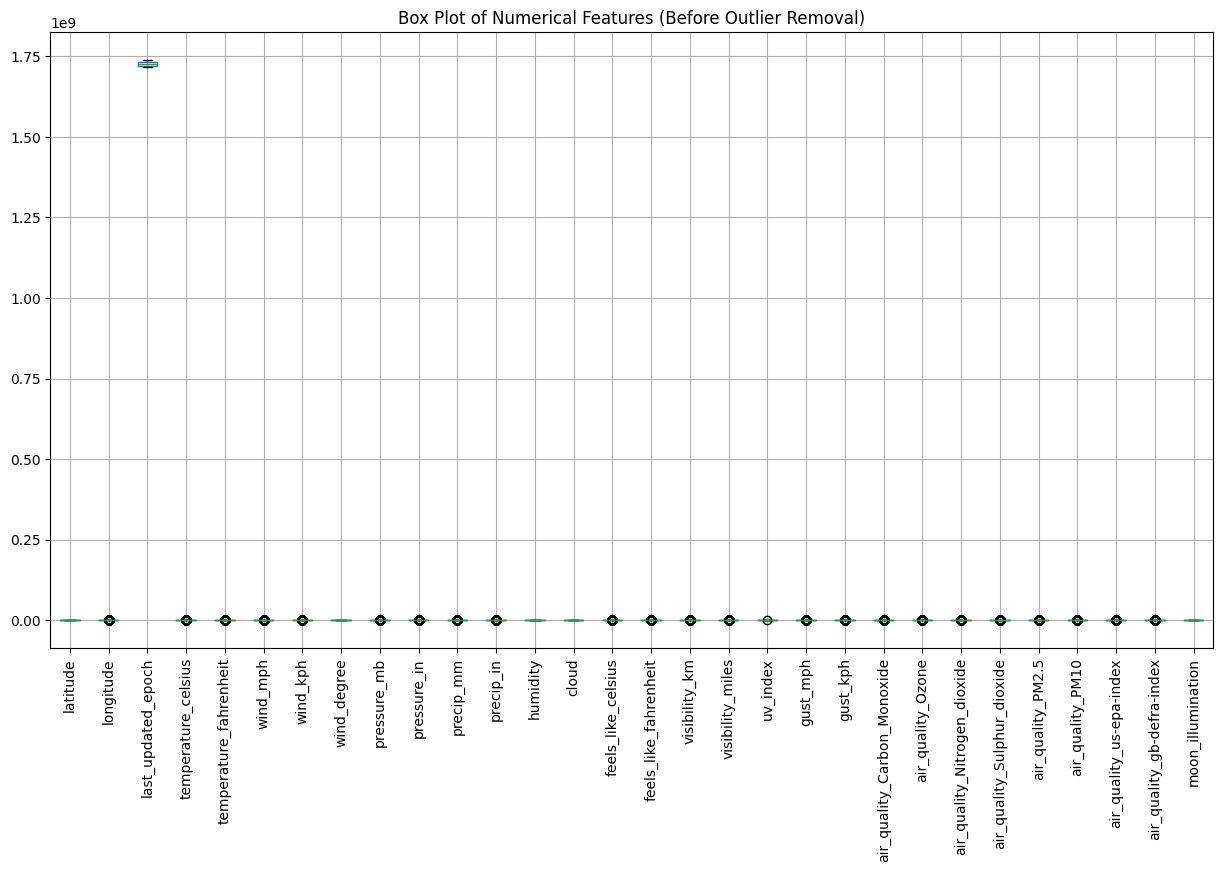

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Box Plot of Numerical Features (Before Outlier Removal)")
plt.show()


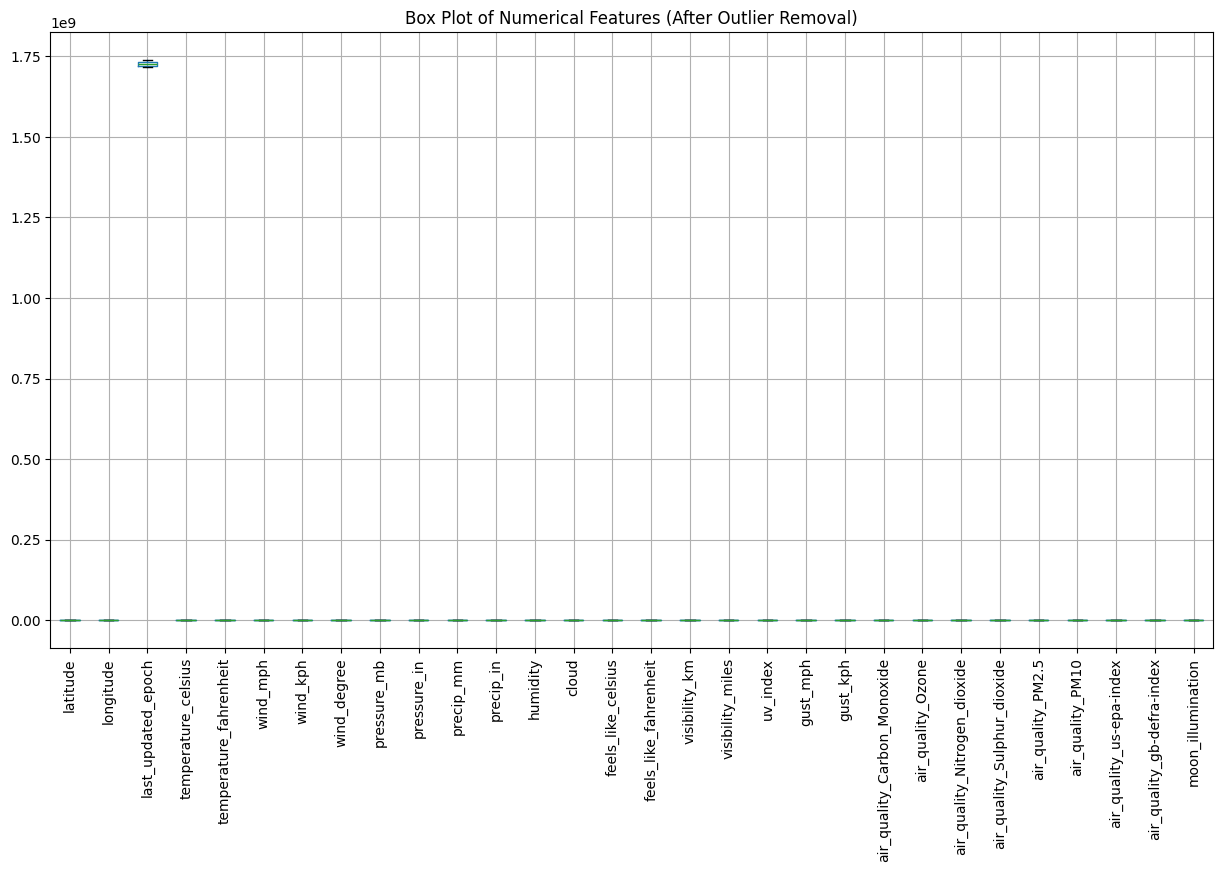

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numerical_cols] = df[numerical_cols].clip(lower_bound, upper_bound, axis=1)

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Box Plot of Numerical Features (After Outlier Removal)")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nFirst 5 rows after normalization:")
df.head()



First 5 rows after normalization:


country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul  0.719014   0.706823      Asia/Kabul   
1      Albania            Tirana  0.783594   0.489684   Europe/Tirane   
2      Algeria           Algiers  0.740256   0.415911  Africa/Algiers   
3      Andorra  Andorra La Vella  0.794689   0.409181  Europe/Andorra   
4       Angola            Luanda  0.307824   0.460694   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0                 0.0  2024-05-16 13:15             0.571759   
1                 0.0  2024-05-16 10:45             0.395833   
2                 0.0  2024-05-16 09:45             0.488426   
3                 0.0  2024-05-16 10:45             0.101852   
4                 0.0  2024-05-16 09:45             0.557870   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                0.569872  Partly Cloudy  ...           0.138416   
1                0.395513  Partly cloudy  ...           0.015417   
2                0.487821          Sunny  ...           0.172115   
3                0.101923  Light drizzle  ...           0.008677   
4                0.557051  Partly cloudy  ...           1.000000   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0          0.279420                       0.0                        0.0   
1          0.019199                       0.0                        0.0   
2          0.192680                       0.0                        0.0   
3          0.007563                       0.0                        0.0   
4          1.000000                       1.0                        1.0   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous               0.55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous               0.55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous               0.55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous               0.55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous               0.55  

[5 rows x 41 columns]

****Exploratory Data Analysis (EDA)****

In [ ]:
print("Dataset Summary:")
print(df.describe())

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Dataset Summary:
           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  50085.000000  50085.000000        50085.000000         50085.000000   
mean       0.573169      0.497887            0.500513             0.489110   
std        0.232156      0.264471            0.290884             0.205399   
min        0.000000      0.000000            0.000000             0.000000   
25%        0.427217      0.375000            0.244763             0.375000   
50%        0.555239      0.505081            0.503895             0.541667   
75%        0.774775      0.625000            0.751766             0.625000   
max        1.000000      1.000000            1.000000             1.000000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            50085.000000  50085.000000  50085.000000  50085.000000   
mean                 0.488498      0.288575      0.287550      0.473061   
std                  0.204838      0.243925      0.2443

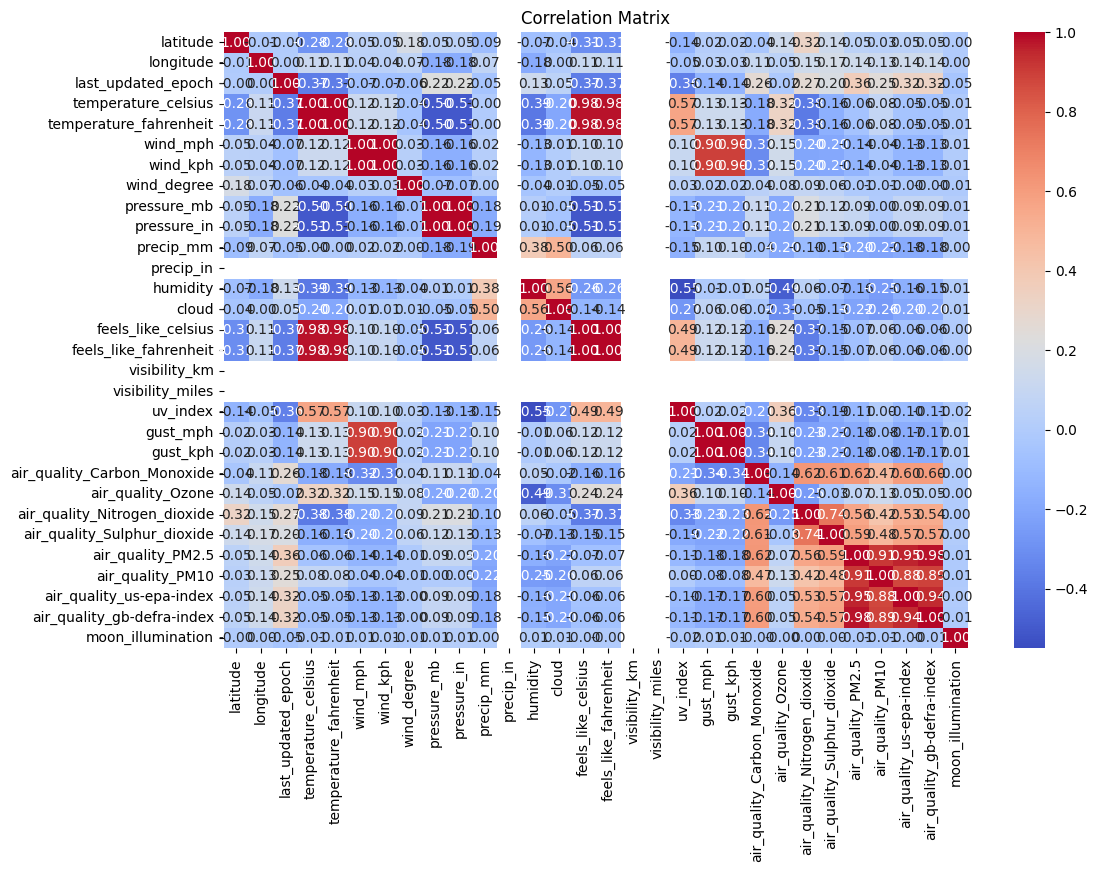

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


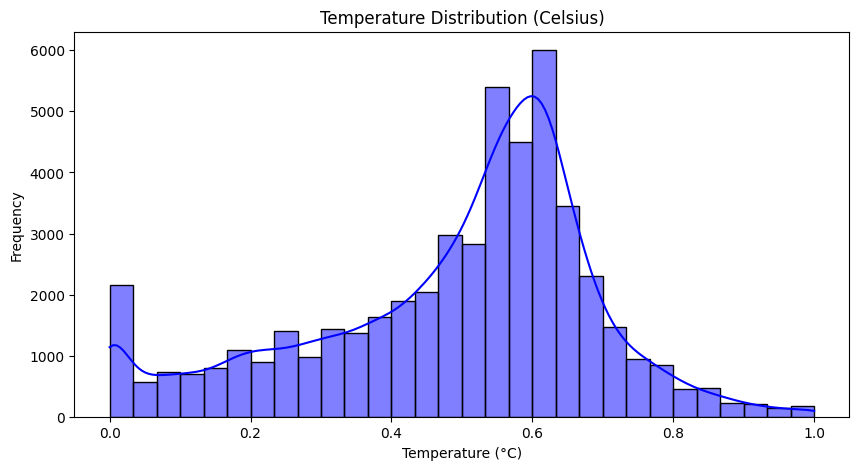

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["temperature_celsius"], bins=30, kde=True, color="blue")
plt.title("Temperature Distribution (Celsius)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


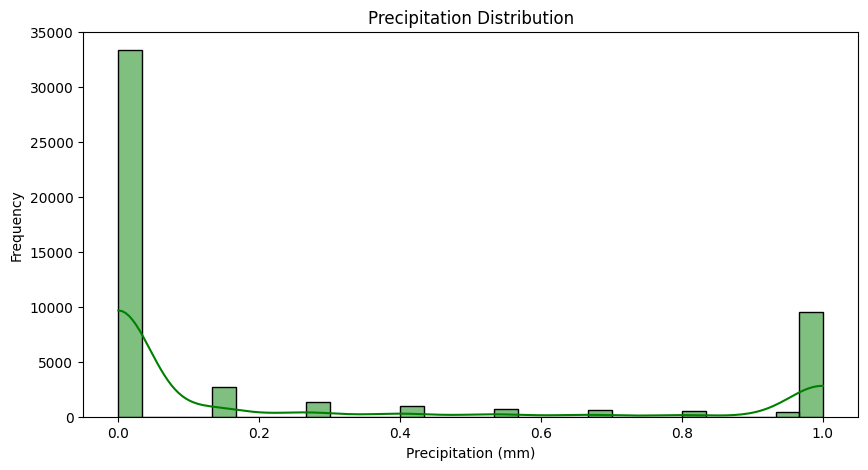

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["precip_mm"], bins=30, kde=True, color="green")
plt.title("Precipitation Distribution")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


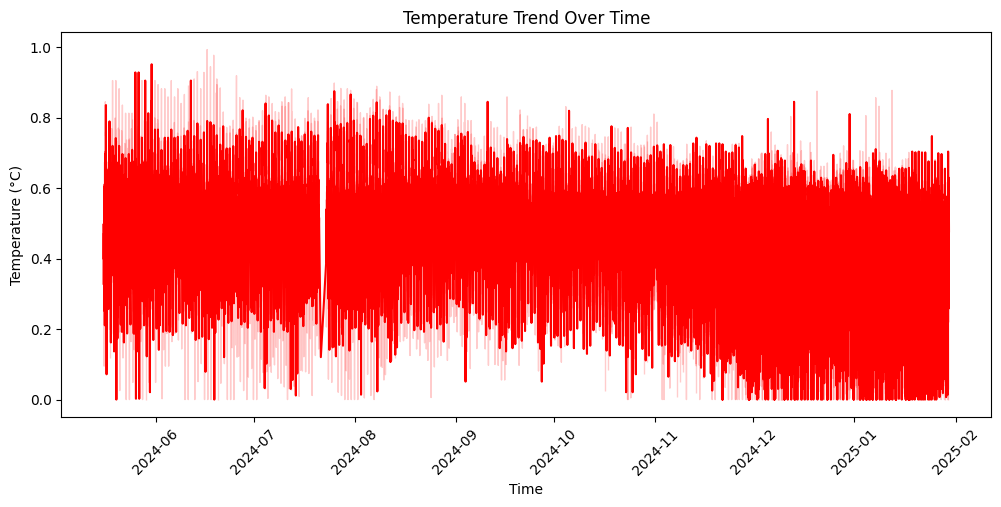

In [ ]:
df["last_updated"] = pd.to_datetime(df["last_updated"])

plt.figure(figsize=(12, 5))
sns.lineplot(x=df["last_updated"], y=df["temperature_celsius"], color="red")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.xticks(rotation=45)
plt.show()


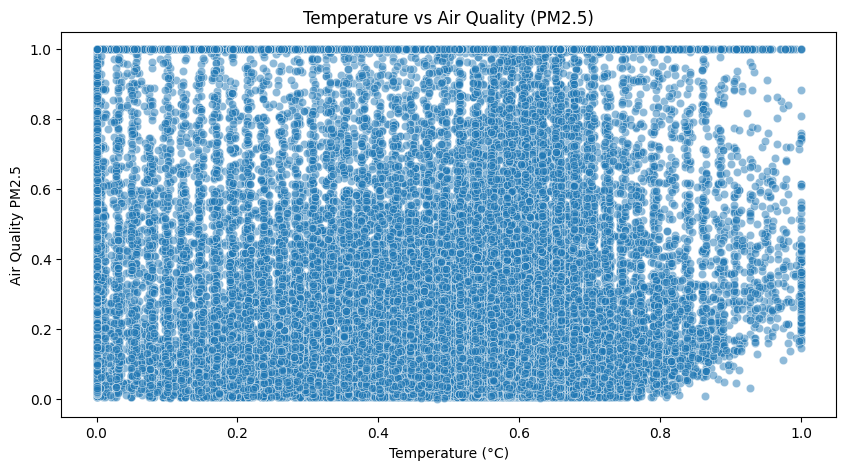

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["temperature_celsius"], y=df["air_quality_PM2.5"], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Quality PM2.5")
plt.title("Temperature vs Air Quality (PM2.5)")
plt.show()


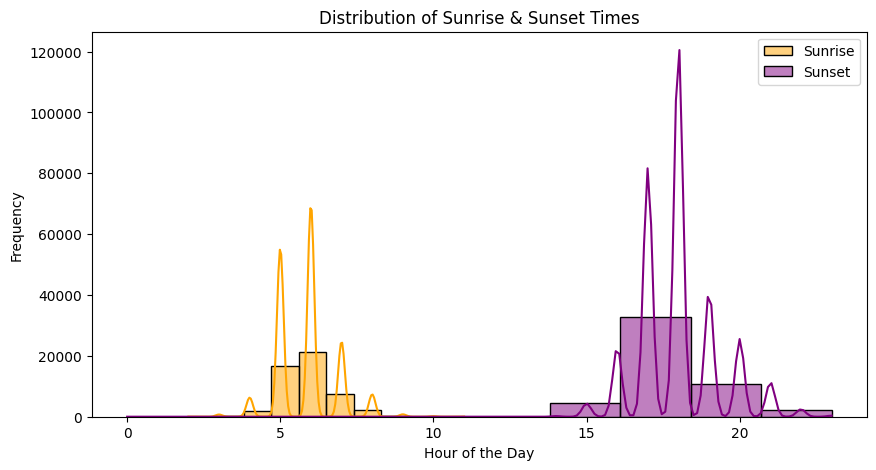

In [ ]:
df["sunrise"] = pd.to_datetime(df["sunrise"], format="%I:%M %p").dt.hour
df["sunset"] = pd.to_datetime(df["sunset"], format="%I:%M %p").dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(df["sunrise"], color="orange", label="Sunrise", kde=True, bins=10)
sns.histplot(df["sunset"], color="purple", label="Sunset", kde=True, bins=10)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Distribution of Sunrise & Sunset Times")
plt.legend()
plt.show()


****Model Building****

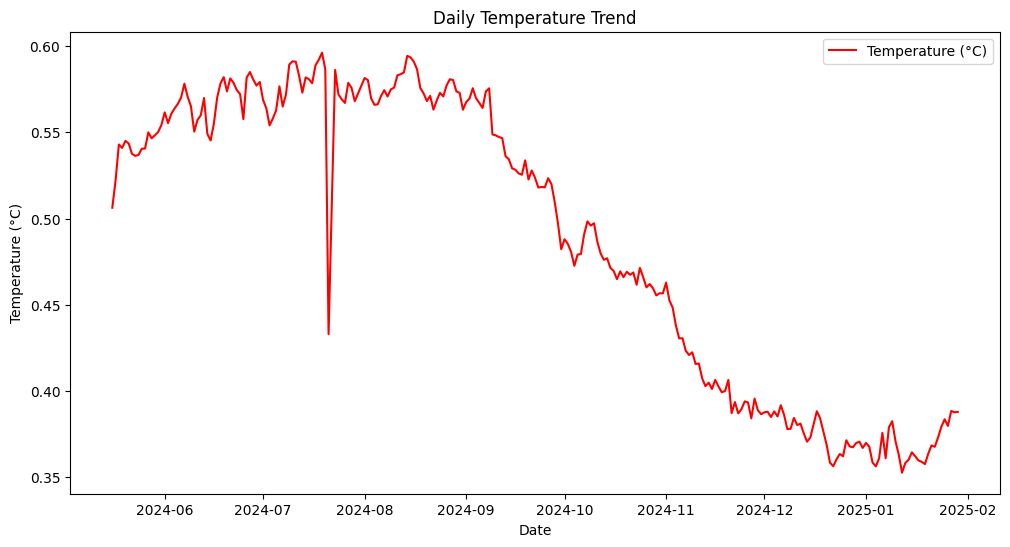

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["last_updated"] = pd.to_datetime(df["last_updated"])
df.set_index("last_updated", inplace=True)

df = df.sort_index()

df_temperature = df["temperature_celsius"].resample("D").mean()  # Resampling to daily data
df_temperature.dropna(inplace=True)  # Drop missing values

plt.figure(figsize=(12, 6))
plt.plot(df_temperature, label="Temperature (°C)", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Trend")
plt.legend()
plt.show()


In [ ]:
train_size = int(len(df_temperature) * 0.8)  # 80% train, 20% test
train, test = df_temperature[:train_size], df_temperature[train_size:]

print("Training Data:", train.shape)
print("Testing Data:", test.shape)


Training Data: (206,)
Testing Data: (52,)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

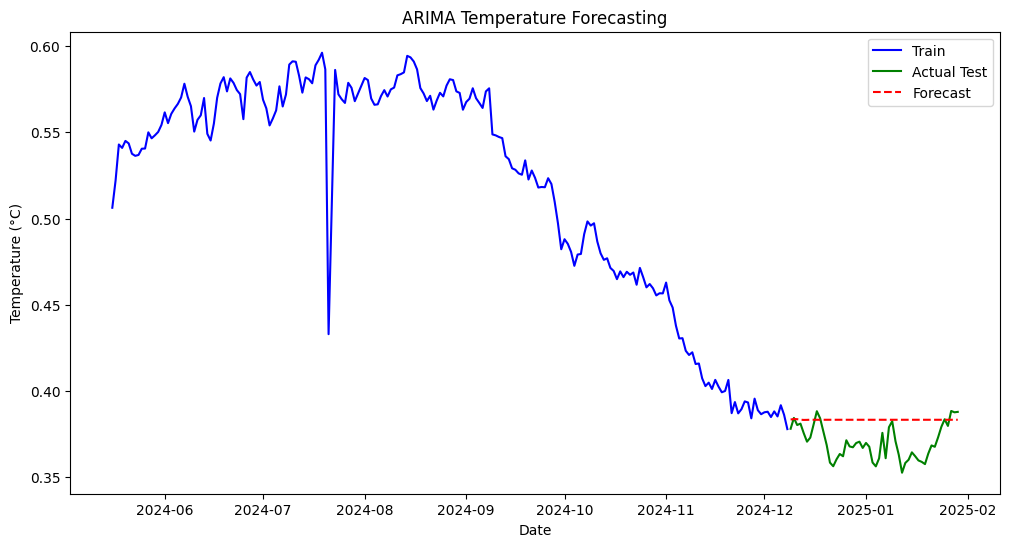

In [ ]:
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q) where (5,1,0) is a common choice
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train, label="Train", color="blue")
plt.plot(test, label="Actual Test", color="green")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("ARIMA Temperature Forecasting")
plt.legend()
plt.show()


In [ ]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


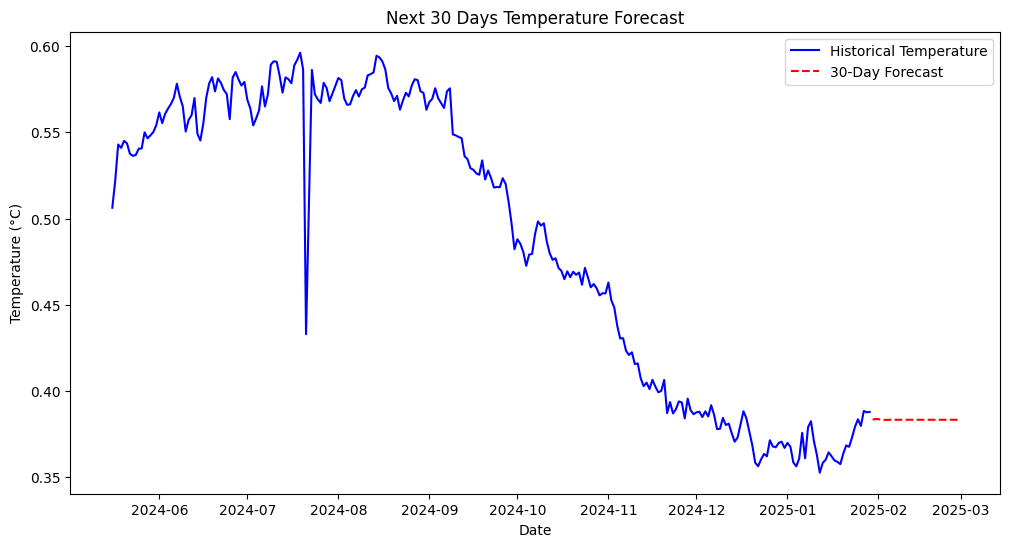

In [ ]:
future_forecast = model_fit.forecast(steps=30)

future_dates = pd.date_range(start=df_temperature.index[-1], periods=31, freq="D")[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_temperature, label="Historical Temperature", color="blue")
plt.plot(future_dates, future_forecast, label="30-Day Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Next 30 Days Temperature Forecast")
plt.legend()
plt.show()


****Advanced EDA****

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

sns.set_style("whitegrid")


Number of anomalies detected: 0


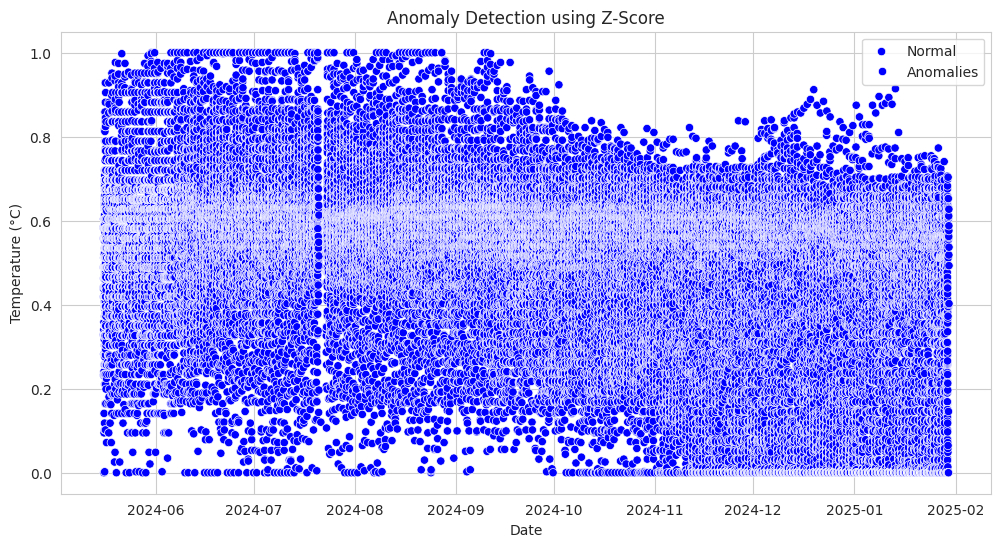

In [ ]:
# Compute Z-scores for temperature column
df["z_score"] = zscore(df["temperature_celsius"])

# Identify outliers (Z-score threshold = 3)
df["is_outlier"] = df["z_score"].apply(lambda x: 1 if abs(x) > 3 else 0)

# Count number of anomalies
num_outliers = df["is_outlier"].sum()
print(f"Number of anomalies detected: {num_outliers}")

# Plot anomalies in temperature data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["temperature_celsius"], hue=df["is_outlier"], palette={0: "blue", 1: "red"})
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Anomaly Detection using Z-Score")
plt.legend(["Normal", "Anomalies"])
plt.show()


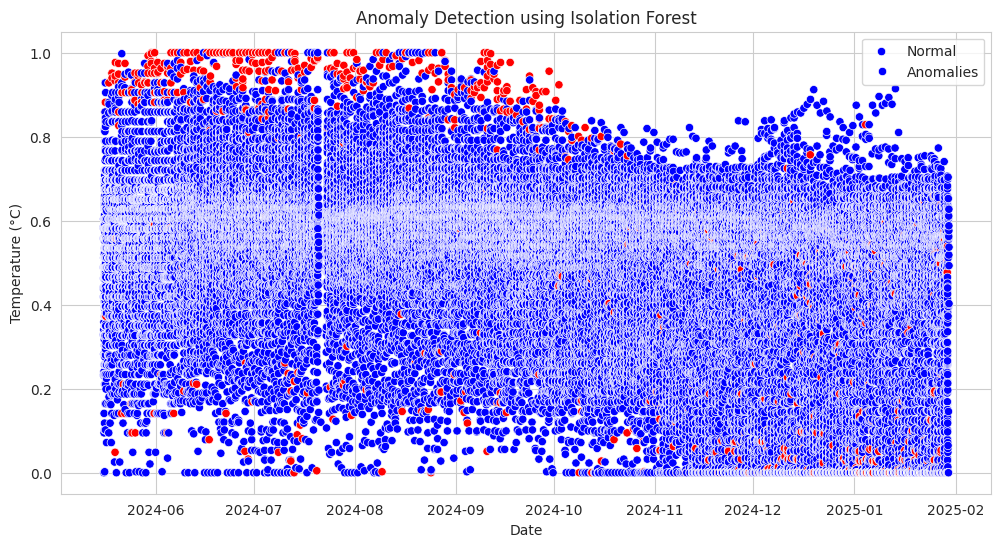

In [ ]:
from sklearn.ensemble import IsolationForest

features = ["temperature_celsius", "humidity", "wind_mph", "air_quality_PM2.5"]
df_filtered = df[features].dropna()

model = IsolationForest(contamination=0.02, random_state=42)
df_filtered["anomaly"] = model.fit_predict(df_filtered)

df_filtered["anomaly"] = df_filtered["anomaly"].apply(lambda x: 1 if x == -1 else 0)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filtered.index, y=df_filtered["temperature_celsius"], hue=df_filtered["anomaly"], palette={0: "blue", 1: "red"})
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Anomaly Detection using Isolation Forest")
plt.legend(["Normal", "Anomalies"])
plt.show()


In [ ]:
anomaly_counts = df[df["is_outlier"] == 1]["location_name"].value_counts()
print(anomaly_counts.head(10))


Series([], Name: count, dtype: int64)


In [ ]:
df_cleaned = df[df["is_outlier"] == 0]
df_cleaned.drop(columns=["z_score", "is_outlier"], inplace=True)


****Forecasting with Multiple Models****

In [ ]:
!pip show fbprophet

In [ ]:
!pip install fbprophet --force-reinstall

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.0 MB/s eta 0:00:00
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 2.1 MB/s eta 0:00:00
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
from xgboost import XGBRegressor

sns.set_style("whitegrid")


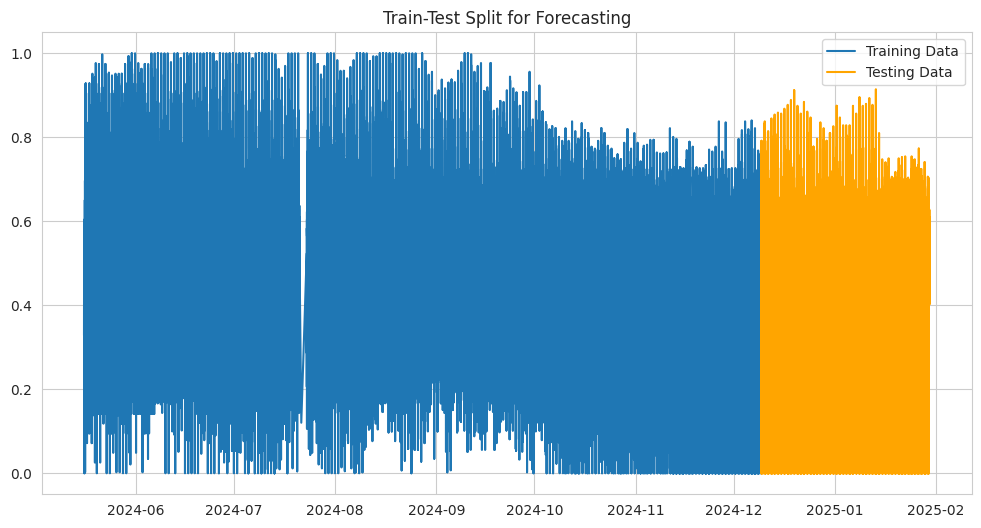

In [ ]:
df = df.reset_index()
df["last_updated"] = pd.to_datetime(df["last_updated"])

df.set_index("last_updated", inplace=True)

df = df.sort_index()

df_forecast = df[["temperature_celsius"]].dropna()  # Drop missing values

train_size = int(len(df_forecast) * 0.8)
train, test = df_forecast.iloc[:train_size], df_forecast.iloc[train_size:]

plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Testing Data", color="orange")
plt.legend()
plt.title("Train-Test Split for Forecasting")
plt.show()


In [ ]:
arima_model = ARIMA(train, order=(5,1,0))  # (p,d,q) order
arima_model_fit = arima_model.fit()

arima_pred = arima_model_fit.forecast(steps=len(test))
print("ARIMA MAE:", mean_absolute_error(test, arima_pred))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA MAE: 0.22027831841337958


In [ ]:
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
hw_model_fit = hw_model.fit()

hw_pred = hw_model_fit.forecast(steps=len(test))
print("Holt-Winters MAE:", mean_absolute_error(test, hw_pred))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Holt-Winters MAE: 0.25166908986518205


In [ ]:
df_prophet = df_forecast.reset_index().rename(columns={"last_updated": "ds", "temperature_celsius": "y"})

prophet_model = Prophet()
prophet_model.fit(df_prophet[:train_size])

future_dates = prophet_model.make_future_dataframe(periods=len(test))
prophet_pred = prophet_model.predict(future_dates)

prophet_y_pred = prophet_pred["yhat"].iloc[-len(test):].values
print("Prophet MAE:", mean_absolute_error(test, prophet_y_pred))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiveen5y/36t26wtu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiveen5y/3wkb1t74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19393', 'data', 'file=/tmp/tmptiveen5y/36t26wtu.json', 'init=/tmp/tmptiveen5y/3wkb1t74.json', 'output', 'file=/tmp/tmptiveen5y/prophet_modelvjlngqe5/prophet_model-20250129123549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAE: 10.565970433804893


In [ ]:
df_forecast["lag_1"] = df_forecast["temperature_celsius"].shift(1)
df_forecast.dropna(inplace=True)

X_train, y_train = df_forecast.iloc[:train_size, 1:], df_forecast.iloc[:train_size, 0]
X_test, y_test = df_forecast.iloc[train_size:, 1:], df_forecast.iloc[train_size:, 0]

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))


XGBoost MAE: 0.2042387451663783


In [ ]:
final_pred = (0.3 * arima_pred[:len(xgb_pred)]) + (0.3 * hw_pred[:len(xgb_pred)]) + (0.2 * prophet_y_pred[:len(xgb_pred)]) + (0.2 * xgb_pred)

ensemble_mae = mean_absolute_error(test[:len(xgb_pred)], final_pred)
print("Ensemble Model MAE:", ensemble_mae)


Ensemble Model MAE: 2.167819986875308


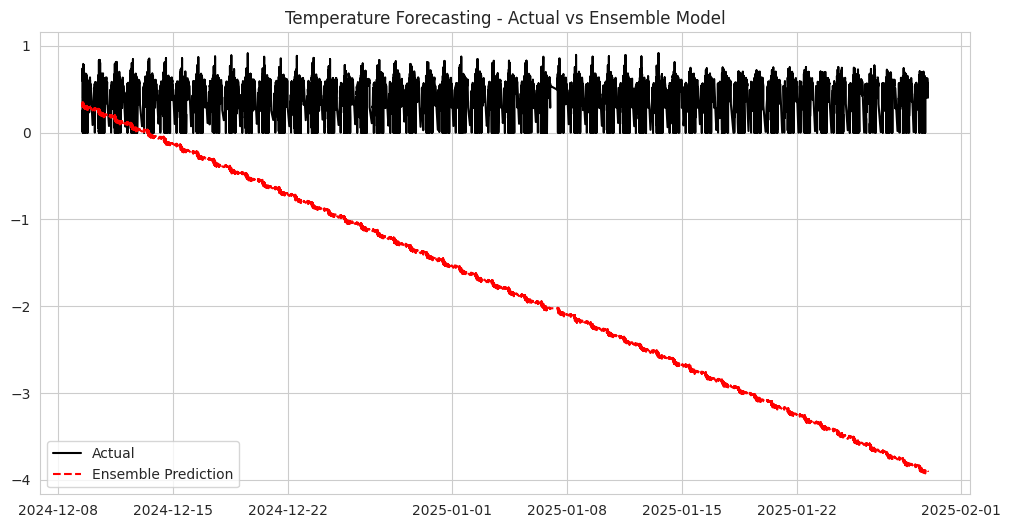

In [ ]:
plt.figure(figsize=(12, 6))
min_len = min(len(test), len(final_pred))

plt.plot(test.index[:min_len], test[:min_len], label="Actual", color="black")
plt.plot(test.index[:min_len], final_pred[:min_len], label="Ensemble Prediction", color="red", linestyle="dashed")
plt.legend()
plt.title("Temperature Forecasting - Actual vs Ensemble Model")
plt.show()


****Unique Analyses****

***Climate Analysis:***

<ipython-input-50-595a2fab7fc3>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_climate = df[["temperature_celsius"]].resample("Y").mean()


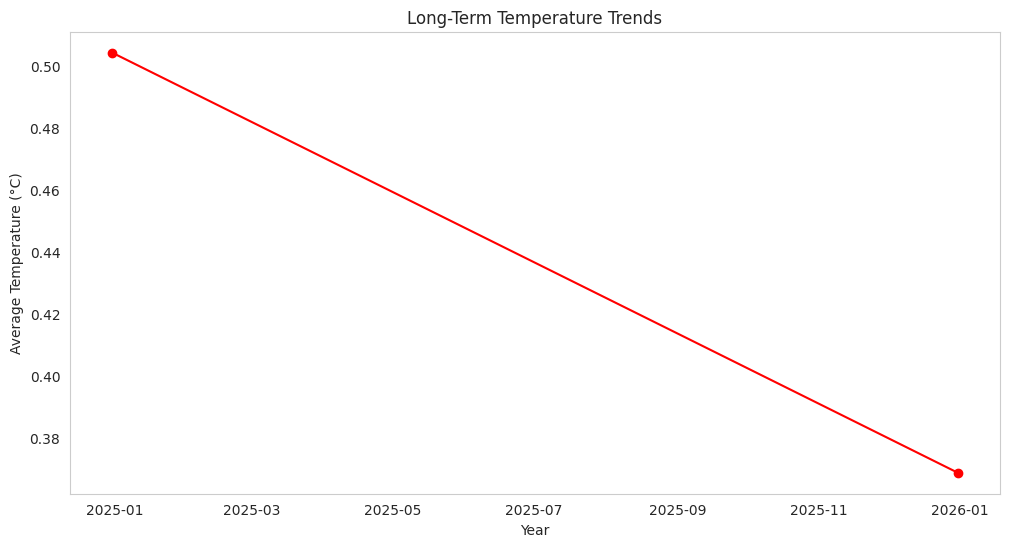

In [ ]:
df_climate = df[["temperature_celsius"]].resample("Y").mean()

plt.figure(figsize=(12, 6))
plt.plot(df_climate.index, df_climate["temperature_celsius"], marker="o", linestyle="-", color="red")
plt.title("Long-Term Temperature Trends")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid()
plt.show()


***Environmental Impact:***

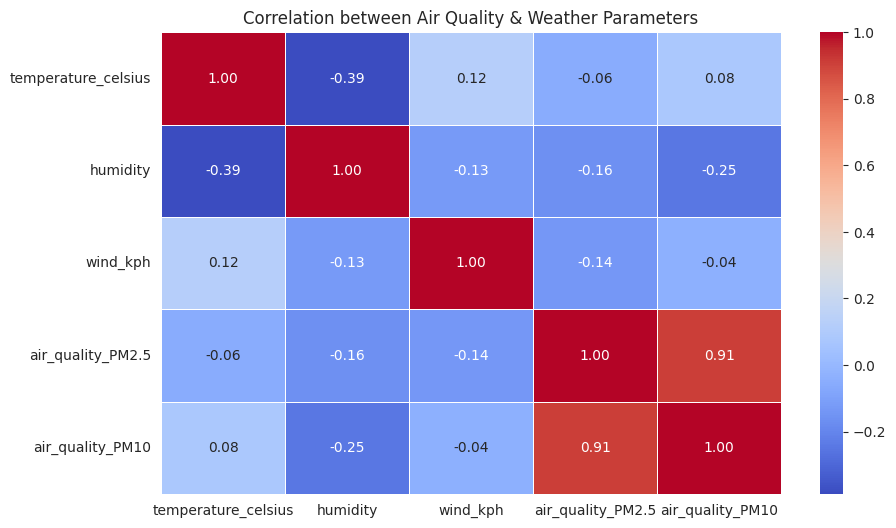

In [ ]:
df_air_quality = df[["temperature_celsius", "humidity", "wind_kph", "air_quality_PM2.5", "air_quality_PM10"]]

corr_matrix = df_air_quality.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Air Quality & Weather Parameters")
plt.show()


***Feature Importance:***

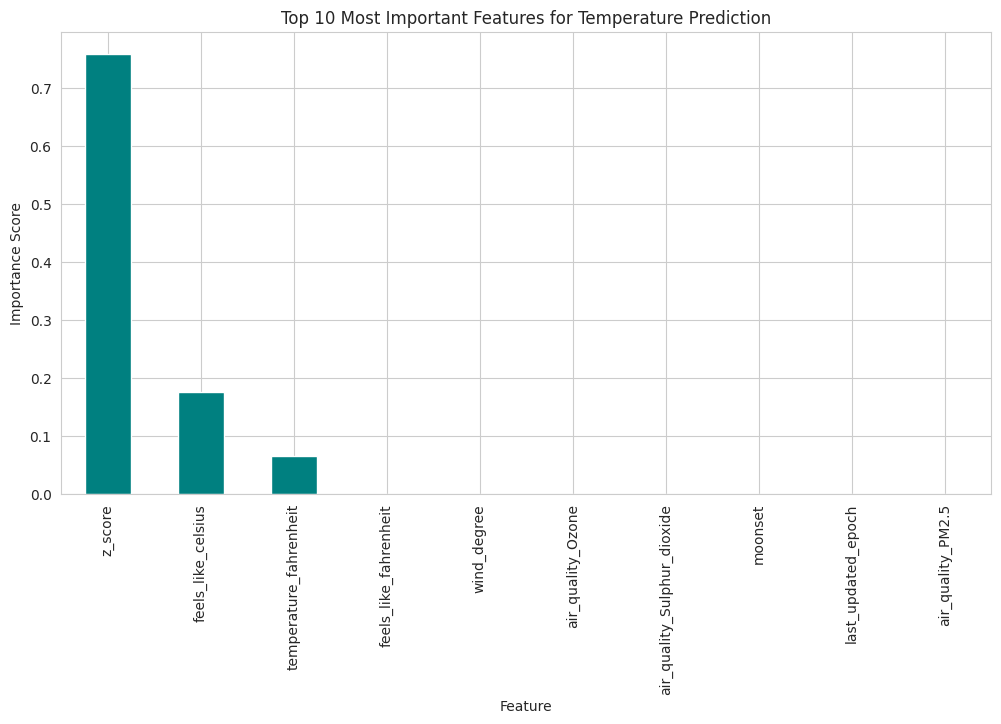

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_ml = df.reset_index().drop(["last_updated"], axis=1).dropna()  # Remove missing values
label_encoders = {}

for col in df_ml.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le

X = df_ml.drop("temperature_celsius", axis=1)
y = df_ml["temperature_celsius"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances[:10].plot(kind="bar", color="teal")
plt.title("Top 10 Most Important Features for Temperature Prediction")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


***Spatial Analysis:***

In [ ]:
import folium
from folium.plugins import HeatMap

map_weather = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=3)

heat_data = list(zip(df["latitude"], df["longitude"], df["temperature_celsius"]))
HeatMap(heat_data).add_to(map_weather)

map_weather


***Geographical Patterns:***

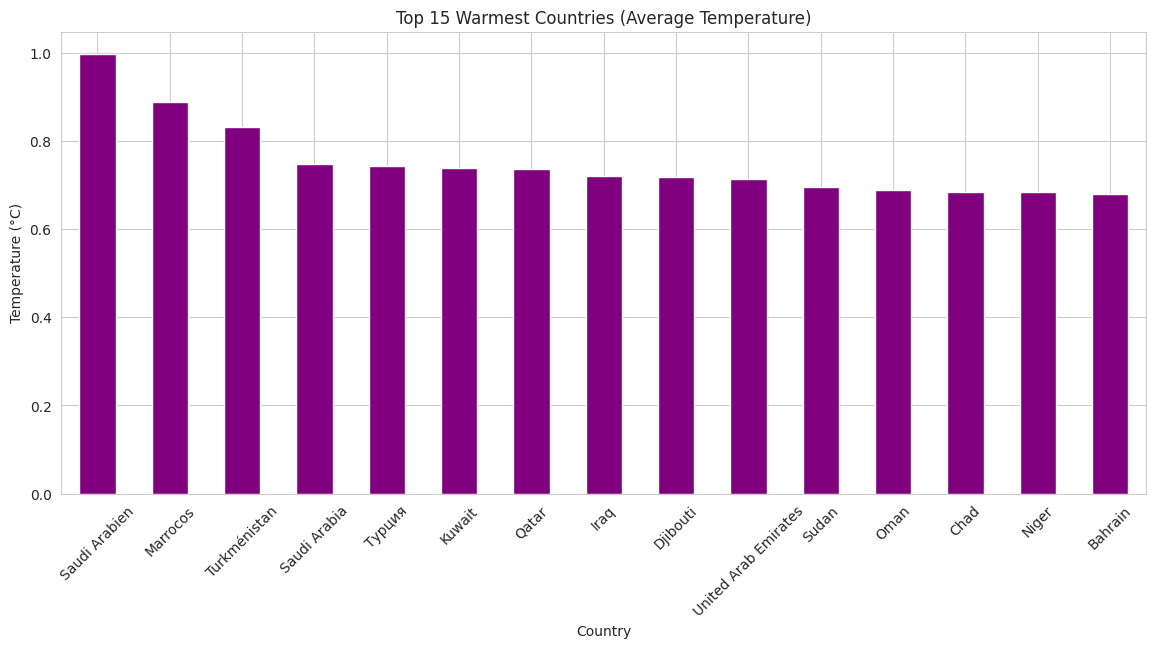

In [ ]:
df_country_temp = df.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
df_country_temp[:15].plot(kind="bar", color="purple")
plt.title("Top 15 Warmest Countries (Average Temperature)")
plt.xlabel("Country")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()
